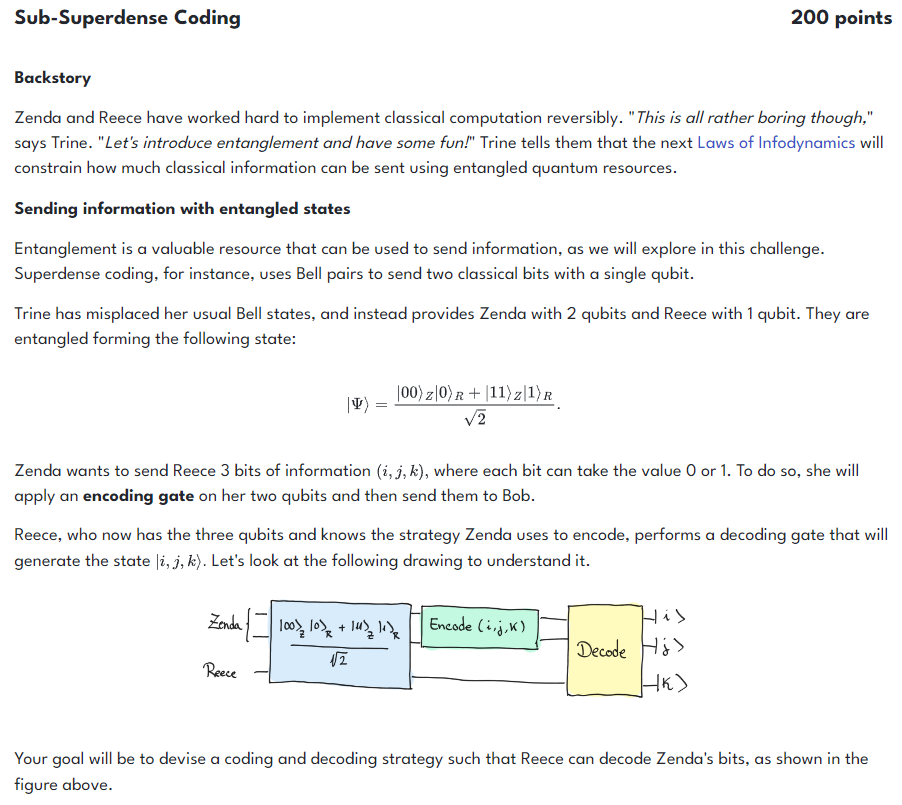

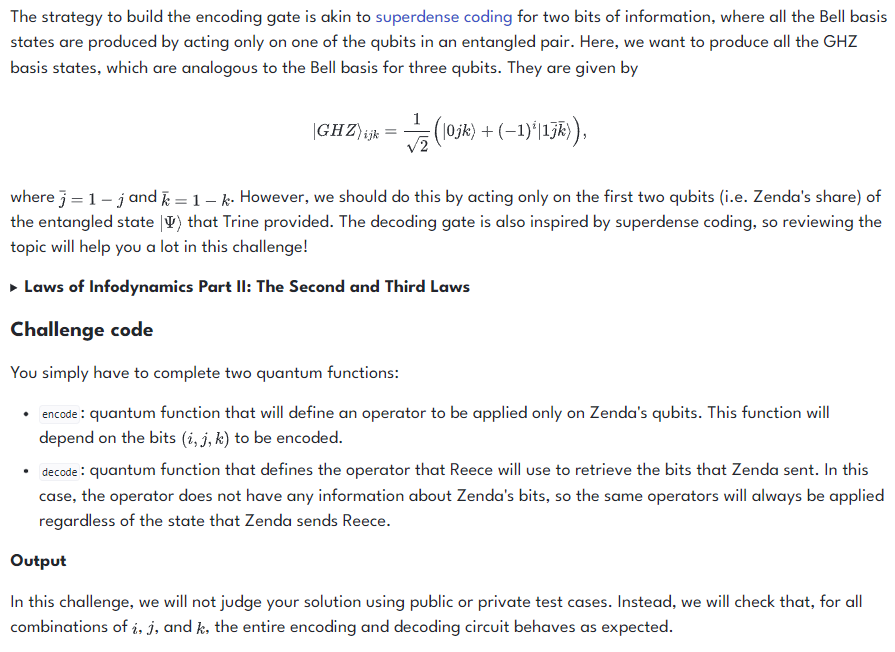

In [43]:
import pennylane as qml
import pennylane.numpy as np

def encode(i, j, k):
    """
    Quantum encoding function. It must act only on the first two qubits.
    This function does not return anything, it simply applies gates.

    Args:
        i, j, k (int): The three encoding bits. They will take the values 1 or 0.

    """
    #print(f'i:{i}, j:{j}, k:{k}')
    #if(i==1):
        #qml.PauliX(wires=0)
        #qml.PauliX(wires=1)
    #    qml.PauliX(wires=1)

    # Put your code here #
    #if(j==0 and k==0):
    #    qml.Identity(wires=1)
    if(j==0 and k==1):
        qml.PauliX(wires=0)
        qml.PauliX(wires=1)
    if(j==1 and k==0):
        qml.PauliZ(wires=0)
        qml.PauliZ(wires=1)
        qml.PauliX(wires=1)
    if(j==1 and k==1):
        qml.PauliX(wires=0)
        qml.PauliZ(wires=0)
        qml.PauliX(wires=1)
        qml.PauliZ(wires=1)
        qml.PauliX(wires=1)
    if(i==1):
        qml.PauliZ(wires=0)
    

def decode():
    """
    Quantum decoding function. It can act on the three qubits.
    This function does not return anything, it simply applies gates.
    """

    # Put your code here #
    #qml.CNOT(wires=[1, 2])
    #qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.Hadamard(wires=0)
    #qml.SWAP(wires=[1,2])


dev = qml.device("default.qubit", wires=3, shots=1)

@qml.qnode(dev)
def circuit(i, j, k):
    """
    Circuit that generates the complete communication protocol.

    Args:
        i, j, k (int): The three encoding bits. They will take the value 1 or 0.
    """

    # We prepare the state 1/sqrt(2)(|000> + |111>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

    # Zenda encodes the bits
    encode(i, j, k)

    # Reece decode the information
    decode()
    #return qml.probs(wires=range(3))
    return qml.sample(wires=[0,1,2])

# These functions are responsible for testing the solution.



def run(test_case_input: str) -> str:

    return None

def check(solution_output: str, expected_output: str) -> None:

    for i in range(2):
        for j in range(2):
            for k in range(2):
                print("==========")
                print(f'i:{i}, j:{j}, k:{k}')
                print(f'{i}{j}{k}')
                result = circuit(i, j , k)
                print(result)
                print(4 * i + 2 * j + k)
                #assert np.isclose(circuit(i, j , k)[4 * i + 2 * j + k],1)
                circuit(i, j , k)
                dev = qml.device("default.qubit", wires=3)

                @qml.qnode(dev)
                def circuit2(i, j, k):
                    encode(i, j, k)
                    return qml.probs(wires=range(3))

                circuit2(i, j, k)
                ops = circuit2.tape.operations

                for op in ops:
                    assert not (2 in op.wires), "Invalid connection between qubits."


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)
        print(output)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
None
i:0, j:0, k:0
000
[0 0 0]
0
i:0, j:0, k:1
001
[0 0 1]
1
i:0, j:1, k:0
010
[0 1 0]
2
i:0, j:1, k:1
011
[0 1 1]
3
i:1, j:0, k:0
100
[1 0 0]
4
i:1, j:0, k:1
101
[1 0 1]
5
i:1, j:1, k:0
110
[1 1 0]
6
i:1, j:1, k:1
111
[1 1 1]
7
Correct!
